# Reflection Spectra over Wavelengths Varying Incidence Angles

This example demonstrates the reflection specra of a one-layer structure with Ag varying incidence angles.

First of all, we import the packages required for this example.

In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as onp

import jaxlayerlumos as jll
import jaxlayerlumos.utils_materials as jll_utils_materials
import jaxlayerlumos.utils_spectra as jll_utils_spectra
import jaxlayerlumos.utils_layers as jll_utils_layers
import jaxlayerlumos.utils_units as jll_utils_units

In the next cell, we define the thickness of silver layer as 20 nm and fetch frequencies, wavelengths, and $(n, k)$ values.

In [2]:
thickness_ag = 20.0

frequencies = jll_utils_spectra.get_frequencies_visible_light() # Frequencies in Hz
wavelengths = jll_utils_spectra.convert_frequencies_to_wavelengths(frequencies) # Wavelengths in m

materials = ["Ag"]
n_k = jll_utils_materials.get_n_k_surrounded_by_air(materials, frequencies)

thicknesses = jll_utils_layers.get_thicknesses_surrounded_by_air(jnp.array([thickness_ag]))
thicknesses = jll_utils_units.convert_nm_to_m(thicknesses)

The incidence angles from 0 degree to 89 degree are defined.

In [3]:
angles = jnp.linspace(0, 89, 100)

It calculates the transmission and reflection spectra of the one-layer structure and then the average of the reflection spectra over TE/TM and wavelengths.

In [4]:
R_TE, T_TE, R_TM, T_TM = jll.stackrt(n_k, thicknesses, frequencies, angles)

R_avg = (R_TE + R_TM) / 2.0
R_avg = onp.array(R_avg)

The next cell obtains coordinate matrices of `wavelengths` and `angles`.

In [5]:
X, Y = onp.meshgrid(wavelengths, angles)

It creates a contour plot of wavelengths, incidence angles, and reflection efficiencies.

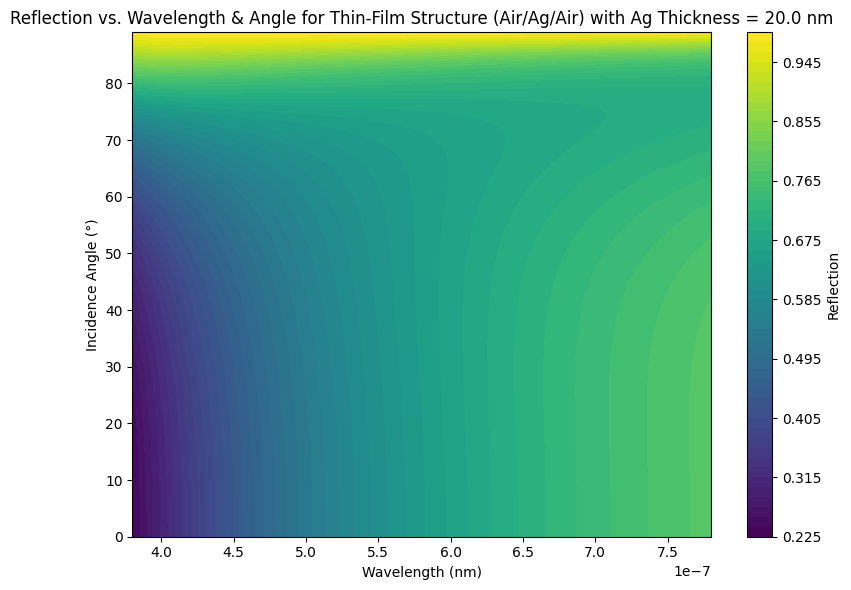

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

contour = ax.contourf(X, Y, R_avg, levels=50, cmap='viridis')

cbar = fig.colorbar(contour)
cbar.set_label("Reflection")

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Incidence Angle (°)")
ax.set_title(f"Reflection vs. Wavelength & Angle for Thin-Film Structure (Air/Ag/Air) with Ag Thickness = {thickness_ag} nm")

plt.tight_layout()
plt.show()